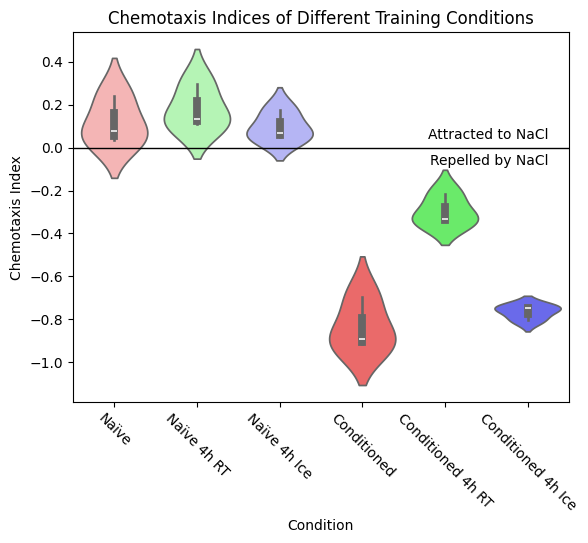

In [216]:
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
from matplotlib import pyplot as plt

# Loading data from an excel csv
df = pd.read_csv(r"C:\Users\lucas\OneDrive\Documents\Research Data.csv")

# Converting the pertinent columns of the dataframe to arrays
n_test = pd.array(df["Test"])
n_control = pd.array(df["Control"])
n_all = pd.array(df["All"])

# Calculating chemotaxis indices
chemotaxis_indices = np.divide(np.subtract(n_test, n_control), n_all)

# Making empty arrays for sorting chemotaxis indices
n0 = []
n4 = []
ni = []
c0 = []
c4 = []
ci = []

# Iterating over the chemotaxis indices and assigning them to the right arrays
for i, index in enumerate(chemotaxis_indices):
    if i <= 2:
        n0.append(index)
    elif i <= 5:
        n4.append(index)
    elif i <= 8:
        ni.append(index)
    elif i <= 11:
        c0.append(index)
    elif i <= 14:
        c4.append(index)
    else:
        ci.append(index)

# Defining colors for the violin plots
colors = ("#FFAAAA", "#AAFFAA", "#AAAAFF", "#FF5555", "#55FF55", "#5555FF")

# Creating violin plots for chemotaxis indices with different colors
sns.violinplot(data=[n0, n4, ni, c0, c4, ci], palette=colors)

plt.xlabel("Condition")
plt.ylabel("Chemotaxis Index")
plt.title("Chemotaxis Indices of Different Training Conditions")
plt.xticks(ticks=np.arange(6), labels=['Naïve', 'Naïve 4h RT', 'Naïve 4h Ice', 'Conditioned', 'Conditioned 4h RT', 'Conditioned 4h Ice'], rotation = -45)  # Set x-axis labels
plt.axhline(y=0, color = "black", linewidth = 1)
plt.annotate(text="Attracted to NaCl", xy=(5.25,0.06), ha = "right", va = "center")
plt.annotate(text="Repelled by NaCl", xy=(5.25,-0.06), ha = "right", va = "center")
plt.show()


Text(0.5, 1.0, 'Learning Indices of Different Training Conditions')

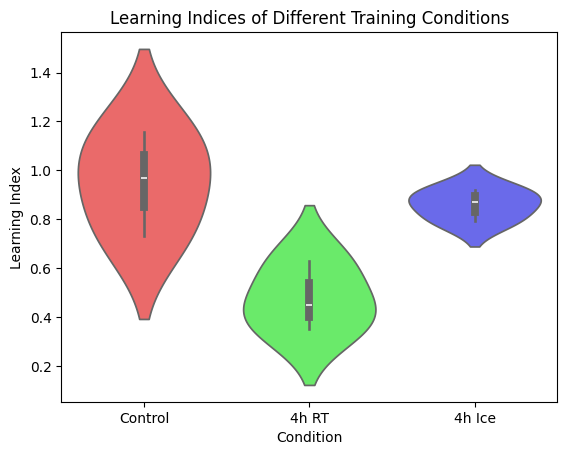

In [217]:
# Calculating learning indices
learn0 = np.subtract(n0, c0)
learn2 = np.subtract(n4, c4)
learni = np.subtract(ni, ci)

# Define colors for the violin plots
colors = ("#FF5555", "#55FF55", "#5555FF")

# Creating violin plots for learning indices with different colors
sns.violinplot(data=[learn0, learn2, learni], palette=colors)
plt.xlabel("Condition")
plt.ylabel("Learning Index")
plt.xticks(ticks=np.arange(3), labels=['Control', '4h RT', '4h Ice'], rotation = 0)  # Set x-axis labels
plt.title("Learning Indices of Different Training Conditions")


In [218]:
# Performing statistical tests
print(sp.stats.levene(n0, n4, ni, c0, c4, ci))
print(sp.stats.f_oneway(n0, n4, ni, c0, c4, ci))
print(sp.stats.tukey_hsd(n0, n4, ni, c0, c4, ci))

print(sp.stats.levene(learn0, learn2, learni))
print(sp.stats.f_oneway(learn0, learn2, learni))
print(sp.stats.tukey_hsd(learn0, learn2, learni))


LeveneResult(statistic=0.2096085866253487, pvalue=0.9519527941451177)
F_onewayResult(statistic=80.42574065952863, pvalue=8.358317858052225e-09)
Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.063     0.946    -0.306     0.180
 (0 - 2)      0.022     1.000    -0.221     0.264
 (0 - 3)      0.953     0.000     0.710     1.195
 (0 - 4)      0.414     0.001     0.172     0.657
 (0 - 5)      0.882     0.000     0.639     1.125
 (1 - 0)      0.063     0.946    -0.180     0.306
 (1 - 2)      0.085     0.841    -0.158     0.327
 (1 - 3)      1.016     0.000     0.773     1.259
 (1 - 4)      0.477     0.000     0.235     0.720
 (1 - 5)      0.945     0.000     0.702     1.188
 (2 - 0)     -0.022     1.000    -0.264     0.221
 (2 - 1)     -0.085     0.841    -0.327     0.158
 (2 - 3)      0.931     0.000     0.688     1.174
 (2 - 4)      0.393     0.002     0.150     0.635
 (2 - 5)      0.860     0.000     0.61